<a href="https://colab.research.google.com/github/ViMo018/GDG_ML/blob/main/GDG_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
df = pd.read_csv('/content/final_dataset.csv')
df.head()

,index,role,committype,fileextensions,numfileschanged,linesadded,linesdeleted,numcommentsadded,timeofcommit,commitmessage
0,0,frontend,feature,[np.str_('js_ts')],4,312,100,2,Friday 17:00,"""Implement responsive UI component with dropdo..."
1,1,frontend,feature,[np.str_('css')],4,191,74,2,Friday 20:00,"""Refactor UI components: Implement responsive ..."
2,2,fullstack,feature,[np.str_('html')],4,275,146,4,Thursday 21:00,"""feat: Implement responsive UI layout with mod..."
3,3,frontend,refactor,[np.str_('js_ts')],4,245,164,2,Thursday 18:00,"""Refactored UI components for responsive layou..."
4,4,fullstack,feature,"[np.str_('js_ts'), np.str_('html')]",2,692,378,5,Sunday 20:00,"""feat: Implement responsive UI layout for logi..."


#EDA

In [138]:
df['role'].value_counts()

,count
role,
backend,484
frontend,444
qa,313
fullstack,259


In [139]:
df['committype'].value_counts()

,count
committype,
feature,596
bugfix,421
test,279
refactor,204


<Axes: xlabel='committype', ylabel='role'>

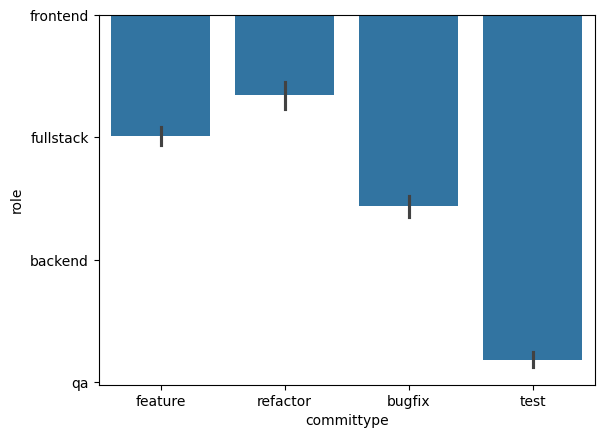

In [140]:
sns.barplot(x='committype', y='role', data=df)


<Axes: xlabel='committype', ylabel='role'>

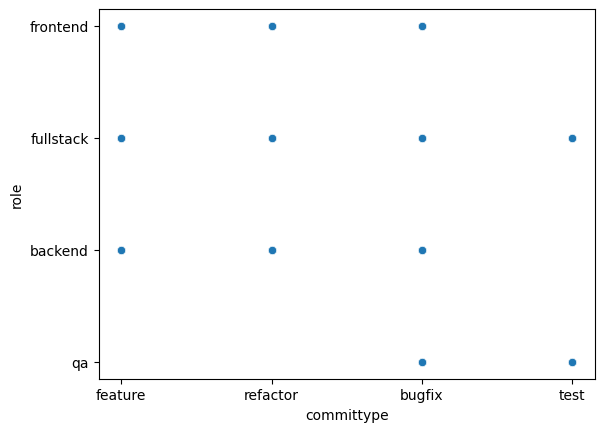

In [141]:
sns.scatterplot(x='committype', y='role', data=df)

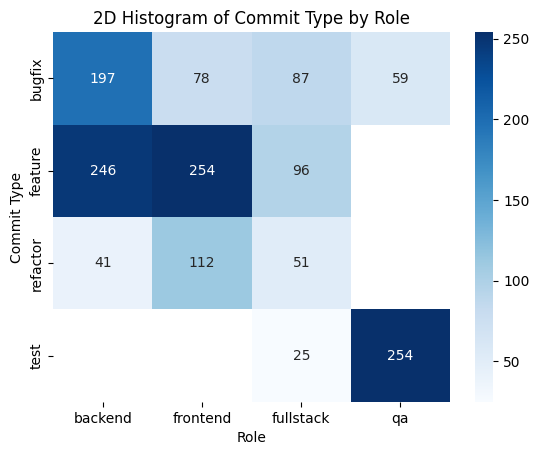

In [142]:
df_2dhist = df.groupby(['committype', 'role']).size().unstack()

sns.heatmap(df_2dhist, annot=True, fmt='.0f', cmap='Blues')
plt.xlabel('Role')
plt.ylabel('Commit Type')
plt.title('2D Histogram of Commit Type by Role')
plt.show()

In [143]:
df_train = X_train.copy()
df_train['role'] = y_train.values


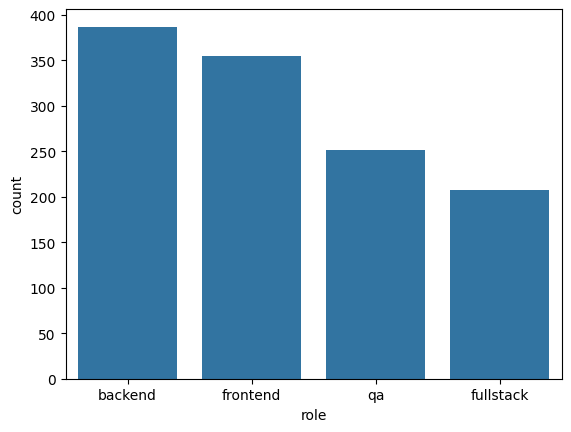

In [144]:
sns.countplot(data = df_train,x='role', order=df_train['role'].value_counts().index)
plt.show()

In [145]:
df_train.head()

,numfileschanged,numcommentsadded,msg_len_words,committype_bugfix,committype_feature,committype_refactor,committype_test,has_frontend,has_backend,has_db,...,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,duration_evening,duration_morning,duration_night,role
885,1,2,57,0.0,0.0,1.0,0.0,0,0,0,...,False,False,False,False,True,False,True,False,False,frontend
206,3,2,31,0.0,1.0,0.0,0.0,1,0,0,...,False,True,False,False,False,False,False,False,False,backend
158,5,4,27,0.0,1.0,0.0,0.0,1,1,0,...,False,False,False,False,False,False,True,False,False,fullstack
1102,1,0,22,0.0,0.0,1.0,0.0,0,0,0,...,False,False,False,True,False,False,False,False,False,backend
168,3,0,18,1.0,0.0,0.0,0.0,0,0,0,...,True,False,False,False,False,False,False,True,False,backend


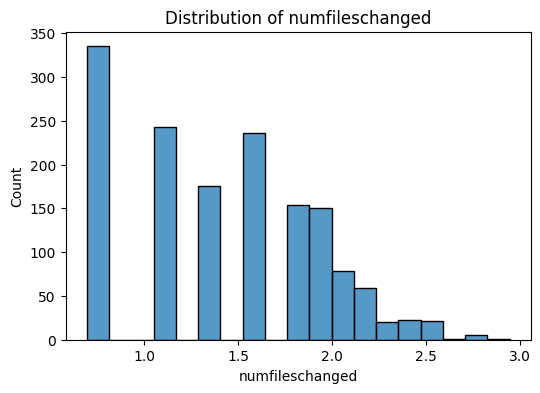

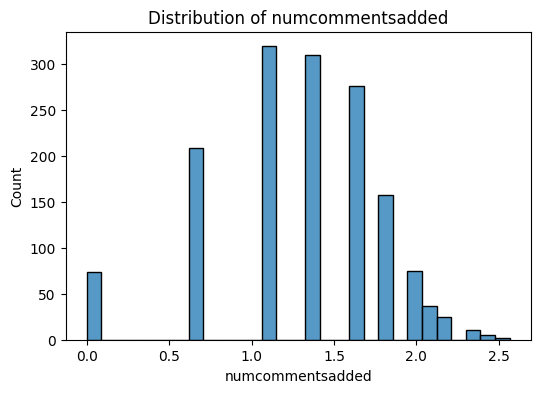

In [146]:
numeric_cols = ['numfileschanged','linesadded','linesdeleted','numcommentsadded']

for c in numeric_cols:
  if c in df_train.columns:
    plt.figure(figsize=(6,4))

    sns.histplot(np.log1p(df[c]), kde=False)
    plt.title(f'Distribution of {c}')
    plt.show()

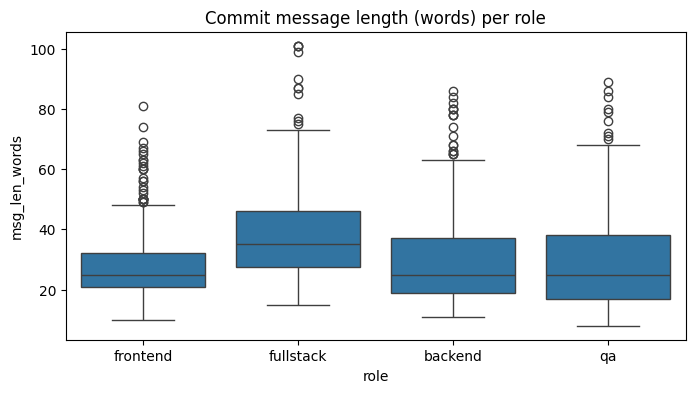

In [147]:
df['msg_len_words'] = df.get('commitmessage', '').astype(str).apply(lambda s: len(s.split()))
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='role', y='msg_len_words')
plt.title('Commit message length (words) per role')
plt.show()

In [148]:
df.isnull().sum()

,0
index,0
role,0
committype,0
fileextensions,0
numfileschanged,0
linesadded,0
linesdeleted,0
numcommentsadded,0
timeofcommit,0
commitmessage,0


In [149]:
df['fileextensions'].value_counts()

,count
fileextensions,
[np.str_('py')],202
[np.str_('js_ts')],171
[np.str_('test_js')],125
[np.str_('java_go')],113
[np.str_('html')],105
...,...
"[np.str_('test_js'), np.str_('py'), np.str_('js_ts')]",1
"[np.str_('java_go'), np.str_('py'), np.str_('py'), np.str_('js_ts')]",1
"[np.str_('java_go'), np.str_('yml_json'), np.str_('js_ts')]",1


/tmp/ipython-input-1593428286.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fileextensions', y='role', data=df_top_extensions, order=top_file_extensions, palette='viridis') # Use a different color palette


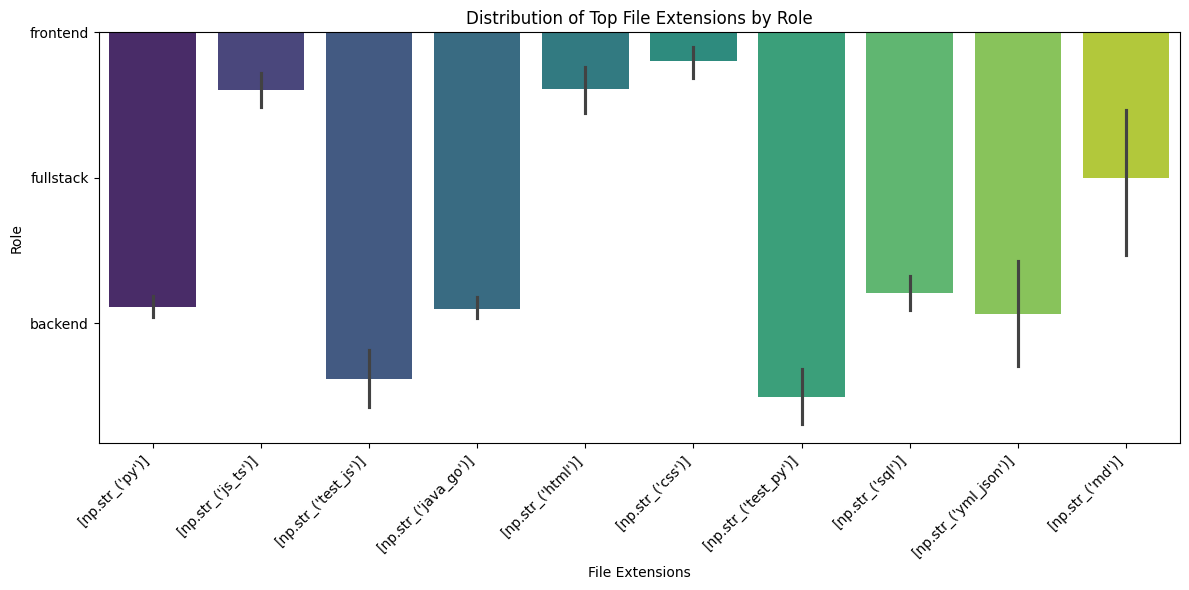

In [150]:
# Get the top N file extensions
top_n = 10  # You can adjust this number
top_file_extensions = df['fileextensions'].value_counts().head(top_n).index.tolist()

# Filter the DataFrame to include only the top file extensions
df_top_extensions = df[df['fileextensions'].isin(top_file_extensions)]

# Create the bar plot with improved aesthetics
plt.figure(figsize=(12, 6)) # Adjust figure size
sns.barplot(x='fileextensions', y='role', data=df_top_extensions, order=top_file_extensions, palette='viridis') # Use a different color palette
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.xlabel('File Extensions')
plt.ylabel('Role')
plt.title('Distribution of Top File Extensions by Role')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

#Data Processing

In [151]:
from sklearn.model_selection import train_test_split
X = df.drop('role', axis=1)
y = df['role']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y ,random_state=42)
X_test

,index,committype,fileextensions,numfileschanged,linesadded,linesdeleted,numcommentsadded,timeofcommit,commitmessage,msg_len_words
1139,1139,test,[np.str_('test_js')],5,51,6,1,Friday 00:00,"""Added 5 test cases for frontend functionality...",44
536,536,test,[np.str_('test_py')],8,166,26,3,Friday 21:00,"""Added unit tests for commit message analysis ...",15
1383,1383,feature,[np.str_('java_go')],2,171,81,3,Sunday 16:00,"Added authentication logic to the backend API,...",38
154,154,bugfix,[np.str_('py')],1,22,18,2,Saturday 19:00,"""Fixed authentication logic in backend API end...",20
356,356,bugfix,"[np.str_('test_js'), np.str_('css')]",3,83,30,1,Friday 22:00,"""Bugfix: Fixed CSS and JS test issues (#1234) ...",18
...,...,...,...,...,...,...,...,...,...,...
533,533,feature,"[np.str_('js_ts'), np.str_('html'), np.str_('p...",6,42,18,4,Friday 15:00,"""Refactor UI layout: Add responsive theme to m...",23
1313,1313,feature,[np.str_('py')],1,94,48,1,Monday 13:00,Implemented authentication endpoint with token...,32
1268,1268,test,[np.str_('test_py')],5,76,11,2,Wednesday 23:00,"""Added test cases for model training: updated ...",23
586,586,feature,[np.str_('py')],5,147,65,6,Thursday 09:00,"""Implement authentication system: add API endp...",13


In [152]:
X_train.head()

,index,committype,fileextensions,numfileschanged,linesadded,linesdeleted,numcommentsadded,timeofcommit,commitmessage,msg_len_words
885,885,refactor,[np.str_('css')],1,23,16,2,Tuesday 22:00,"""Refactored CSS for page layout, improved resp...",57
206,206,feature,"[np.str_('py'), np.str_('html'), np.str_('css')]",3,662,332,2,Saturday 14:00,"""Implement API endpoint for user login with to...",31
158,158,feature,"[np.str_('css'), np.str_('js_ts'), np.str_('py...",5,98,32,4,Friday 21:00,"""feat: Implement responsive UI layout with mod...",27
1102,1102,refactor,[np.str_('py')],1,40,56,0,Thursday 14:00,Refactored login endpoint to validate user cre...,22
168,168,bugfix,[np.str_('sql')],3,99,53,0,Monday 08:00,"""Fixed authentication logic in backend API: up...",18


***For committype i had 2 options***

1. Applying Label Encoder

        like 1 for feature 2 for bugfix and so on.. but there is a problem that it gives priority to certain high numbers in someways

2. Applying OHE

        Ig this is the best thing to do over here because it increases dimensions and baiscally i think i need random forest for this so increasing dimensions might help

        

In [153]:
#apply ohe on committype
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(X_train[['committype']])
X_train_ohe = pd.DataFrame(
    ohe.transform(X_train[['committype']]).toarray(),
    columns=ohe.get_feature_names_out(['committype']),
    index=X_train.index
)

X_test_ohe = pd.DataFrame(
    ohe.transform(X_test[['committype']]).toarray(),
    columns=ohe.get_feature_names_out(['committype']),
    index=X_test.index
)
X_train = X_train.drop(columns = ['committype'])
X_test = X_test.drop(columns = ['committype'])
X_train = pd.concat([X_train, X_train_ohe], axis=1)
X_test = pd.concat([X_test, X_test_ohe], axis=1)

In [154]:
X_train.shape

(1200, 13)

***File Extension***


I have many options

1. **OHE**

applying ohe on each extension like for every extension i will apply ohe

*Disadvantages*

            There will be a lot many columns which will be very tough to handle

*Advantages*

            Good for tree models as they handle many columns well

2. **Vectorization Count**

Applying vectorization method like *bag of words* or *tf-idf* with ngrams of 1,2 i will try to convert ['py' , 'html', 'css'] something like this and then apply this all


*Advantages*

          simple and manages the frequency also

*Diadvantages*

          less interpretable because extension are not always same but still worth a try

3. **Group Flags**

This is what i think is proper because grouping in terms of role category will really help a lot like grouping in category of words like *has_frontend, has_backend, has_db, has_docs, num_ext* will haelp a lot over here

*Advantages*

          Very interpretable, small dimensionality

*Disadvantages*

          py and java both count in backend i think i need to make function to add both in it


**Priority**

1. Group Flags
2. Vectorization Count
3. OHE



In [155]:
#used llm for this

import ast, re, pandas as pd

def fileext(series, debug_n=0):
    """
    series: pd.Series containing entries like:
      [np.str_('py')]
      [np.str_('js_ts')]
      "[np.str_('py'), np.str_('html'), np.str_('css')]"
    Returns: DataFrame with columns:
      has_frontend, has_backend, has_db, has_docs, has_test, num_ext
    """
    # canonical sets (tokens we consider -> extend if needed)
    frontend_tokens = {'html','css','js','ts','jsx','tsx'}
    backend_tokens  = {'py','java','go','cpp','c','rb','php','cs'}
    db_tokens       = {'sql','db'}
    docs_tokens     = {'md','yml','yaml','json','txt','rst'}
    # we detect test by substring 'test' in token (covers test_js, test_py)

    out = {
        'has_frontend': [],
        'has_backend': [],
        'has_db': [],
        'has_docs': [],
        'has_test': [],
        'num_ext': []
    }

    parsed_examples = []  # for optional debug print

    for raw in series.fillna(''):
        tokens = []
        # raw might already be a Python list (of np.str_) or a string like "[np.str_('py'), ...]"
        try:
            if isinstance(raw, (list, tuple)):
                raw_list = raw
            else:
                # try to literal-eval; if fails, treat as plain string
                raw_list = ast.literal_eval(str(raw))
        except Exception:
            # fallback: treat as comma/space separated string
            raw_list = [str(raw)]

        # raw_list contains elements like np.str_('py') or 'np.str_(...)' or 'py'
        for item in raw_list:
            s = str(item).lower()
            # remove wrapping np.str_('...') if present
            s = re.sub(r"np\.str_\('([^']+)'\)", r"\1", s)
            # remove quotes/brackets
            s = s.strip(" '\"")
            if not s:
                continue
            # split combined tokens by non-alphanumeric (underscore, dash, slash, comma)
            parts = re.split(r'[_\-\s/\\,]+', s)
            # also split tokens that have multiple tokens glued like 'yml_json' already handled above
            for p in parts:
                p = p.strip().lower()
                if p:
                    tokens.append(p)

        tokens = [t for t in tokens if t]          # filter empties
        tokens_set = set(tokens)

        # flags
        is_front = int(bool(tokens_set & frontend_tokens))
        is_back  = int(bool(tokens_set & backend_tokens))
        is_db    = int(bool(tokens_set & db_tokens))
        is_docs  = int(bool(tokens_set & docs_tokens))
        is_test  = int(any('test' in t for t in tokens_set))
        n_exts   = len(tokens_set)

        out['has_frontend'].append(is_front)
        out['has_backend'].append(is_back)
        out['has_db'].append(is_db)
        out['has_docs'].append(is_docs)
        out['has_test'].append(is_test)
        out['num_ext'].append(n_exts)

        if debug_n and len(parsed_examples) < debug_n:
            parsed_examples.append((raw, tokens, {'frontend':is_front,'backend':is_back,'db':is_db,'docs':is_docs,'test':is_test}))

    df_out = pd.DataFrame(out, index=series.index)

    if debug_n:
        print("Sample parsed rows (raw -> tokens -> flags):")
        for r in parsed_examples:
            print(r)
    return df_out


In [156]:
fileext_train = fileext(X_train['fileextensions'])
fileext_test = fileext(X_test['fileextensions'])

X_train = X_train.drop(columns = ['fileextensions'])
X_test = X_test.drop(columns = ['fileextensions'])

X_train = pd.concat([X_train, fileext_train], axis=1)
X_test = pd.concat([X_test, fileext_test], axis=1)



In [157]:
X_train.head()

,index,numfileschanged,linesadded,linesdeleted,numcommentsadded,timeofcommit,commitmessage,msg_len_words,committype_bugfix,committype_feature,committype_refactor,committype_test,has_frontend,has_backend,has_db,has_docs,has_test,num_ext
885,885,1,23,16,2,Tuesday 22:00,"""Refactored CSS for page layout, improved resp...",57,0.0,0.0,1.0,0.0,0,0,0,0,0,1
206,206,3,662,332,2,Saturday 14:00,"""Implement API endpoint for user login with to...",31,0.0,1.0,0.0,0.0,1,0,0,0,0,3
158,158,5,98,32,4,Friday 21:00,"""feat: Implement responsive UI layout with mod...",27,0.0,1.0,0.0,0.0,1,1,0,0,0,5
1102,1102,1,40,56,0,Thursday 14:00,Refactored login endpoint to validate user cre...,22,0.0,0.0,1.0,0.0,0,0,0,0,0,1
168,168,3,99,53,0,Monday 08:00,"""Fixed authentication logic in backend API: up...",18,1.0,0.0,0.0,0.0,0,0,0,0,0,1


**Now I am starting for Numerical Columns about files , numcomments and all that my basic need is to keep this scaled like jyadaa outliers naa mile aur value scaled rahe**

so i am going to do log transform or that between 0 and 1 waala transform

ek baar dekh leta hun ki in sab ka description kya hai


In [158]:
num_cols = ['numfileschanged','linesadded','linesdeleted','numcommentsadded']

In [159]:
X_train.columns

Index(['index', 'numfileschanged', 'linesadded', 'linesdeleted',
       'numcommentsadded', 'timeofcommit', 'commitmessage', 'msg_len_words',
       'committype_bugfix', 'committype_feature', 'committype_refactor',
       'committype_test', 'has_frontend', 'has_backend', 'has_db', 'has_docs',
       'has_test', 'num_ext'],
      dtype='object')

In [160]:
X_train[num_cols].describe()

,numfileschanged,linesadded,linesdeleted,numcommentsadded
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,3.770833,184.138333,93.075000,3.169167
std,2.508032,259.821988,154.012892,1.917972
min,1.000000,8.000000,1.000000,0.000000
25%,2.000000,54.000000,17.000000,2.000000
50%,3.000000,103.000000,46.000000,3.000000
75%,5.000000,208.250000,102.000000,4.000000
max,18.000000,3038.000000,1992.000000,12.000000


**Conclusion on numcols**


no missing values good

mean of linesadded is max

variance of linesadded is more

**Changes I am going to do in num columns**

*num of fileschanged is small so no change*

*lines added is not skewed like tail mai bahot high values hai toh i will do log scaled*

*lines deleted same problem*

*numcommentsadded same small hai toh koi problem nahi honi chahiye*




In [161]:
X_train['linesadded_log'] = np.log1p(X_train['linesadded'])
X_test['linesadded_log'] = np.log1p(X_test['linesadded'])


X_train['linesdeleted_log'] = np.log1p(X_train['linesdeleted'])
X_test['linesdeleted_log'] = np.log1p(X_test['linesdeleted'])


In [162]:
X_train.sample()

,index,numfileschanged,linesadded,linesdeleted,numcommentsadded,timeofcommit,commitmessage,msg_len_words,committype_bugfix,committype_feature,committype_refactor,committype_test,has_frontend,has_backend,has_db,has_docs,has_test,num_ext,linesadded_log,linesdeleted_log
862,862,2,54,24,1,Wednesday 15:00,Fixed dropdown menu layout issue on responsive...,33,1.0,0.0,0.0,0.0,0,0,0,0,0,1,4.007333,3.218876


*Another thing is to derive columns i mean to say like i need to reduce columns to meaningfull columns*

In [163]:
X_train['net_lines'] = X_train['linesadded'] - X_train['linesdeleted']
X_test['net_lines'] = X_test['linesadded'] - X_test['linesdeleted']

In [164]:
X_train['churn'] = X_train['linesadded'] + X_train['linesdeleted']
X_test['churn'] = X_test['linesadded'] + X_test['linesdeleted']

In [165]:
X_train['avg_added_file'] = X_train['linesadded']/X_train['numfileschanged']
X_test['avg_added_file'] = X_test['linesadded']/X_test['numfileschanged']

In [166]:
X_train['avg_deleted_file'] = X_train['linesdeleted']/X_train['numfileschanged']
X_test['avg_deleted_file'] = X_test['linesdeleted']/X_test['numfileschanged']

In [167]:
X_train['comment_ratio'] = X_train['numcommentsadded']/X_train['linesadded']
X_test['comment_ratio'] = X_test['numcommentsadded']/X_test['linesadded']

In [168]:
X_train = X_train.drop(columns=['linesadded','index'])
X_test = X_test.drop(columns= ['linesadded','index'])
X_train = X_train.drop(columns='linesdeleted')
X_test = X_test.drop(columns = 'linesdeleted')


In [169]:
X_train.columns

Index(['numfileschanged', 'numcommentsadded', 'timeofcommit', 'commitmessage',
       'msg_len_words', 'committype_bugfix', 'committype_feature',
       'committype_refactor', 'committype_test', 'has_frontend', 'has_backend',
       'has_db', 'has_docs', 'has_test', 'num_ext', 'linesadded_log',
       'linesdeleted_log', 'net_lines', 'churn', 'avg_added_file',
       'avg_deleted_file', 'comment_ratio'],
      dtype='object')

**This is final for num values i dont see any other idea/approach**


In [170]:
X_train['timeofcommit'].value_counts()

,count
timeofcommit,
Wednesday 15:00,21
Thursday 21:00,20
Friday 19:00,20
Friday 15:00,19
Friday 20:00,19
...,...
Sunday 03:00,1
Wednesday 06:00,1
Sunday 07:00,1


**Now for this time thing i need to something like changing it into columns like hour,week(then doing num encoding for week), and min also**



In [171]:
#Extract Weekdays

X_train['dayofweek'] = X_train['timeofcommit'].str.split().str[0]
X_test['dayofweek']  = X_test['timeofcommit'].str.split().str[0]

#extract hours

X_train['hour'] = X_train['timeofcommit'].str.extract(r'(\d+):')[0].astype(int)
X_test['hour'] = X_test['timeofcommit'].str.extract(r'(\d+):')[0].astype(int)


*WHAT IF I ADD MORING AFTERNOON AND NIGHT ALSO !!!!*

In [172]:
def duration(h):
  if 6<=h < 12: return 'morning'
  elif 12<=h < 18: return 'afternoon'
  elif 18<=h < 24: return 'evening'
  else: return 'night'

X_train['duration'] = X_train['hour'].apply(duration)
X_test['duration'] = X_test['hour'].apply(duration)

In [173]:
X_train.head()

,numfileschanged,numcommentsadded,timeofcommit,commitmessage,msg_len_words,committype_bugfix,committype_feature,committype_refactor,committype_test,has_frontend,...,linesadded_log,linesdeleted_log,net_lines,churn,avg_added_file,avg_deleted_file,comment_ratio,dayofweek,hour,duration
885,1,2,Tuesday 22:00,"""Refactored CSS for page layout, improved resp...",57,0.0,0.0,1.0,0.0,0,...,3.178054,2.833213,7,39,23.000000,16.000000,0.086957,Tuesday,22,evening
206,3,2,Saturday 14:00,"""Implement API endpoint for user login with to...",31,0.0,1.0,0.0,0.0,1,...,6.496775,5.808142,330,994,220.666667,110.666667,0.003021,Saturday,14,afternoon
158,5,4,Friday 21:00,"""feat: Implement responsive UI layout with mod...",27,0.0,1.0,0.0,0.0,1,...,4.595120,3.496508,66,130,19.600000,6.400000,0.040816,Friday,21,evening
1102,1,0,Thursday 14:00,Refactored login endpoint to validate user cre...,22,0.0,0.0,1.0,0.0,0,...,3.713572,4.043051,-16,96,40.000000,56.000000,0.000000,Thursday,14,afternoon
168,3,0,Monday 08:00,"""Fixed authentication logic in backend API: up...",18,1.0,0.0,0.0,0.0,0,...,4.605170,3.988984,46,152,33.000000,17.666667,0.000000,Monday,8,morning


***NOW TIME FOR COMMIT MESSAGE I HAVE THREE OPTIONS***


1. Vectorization in tf-idf (ig this is best)
2. Vectorization in bagofwords (not bad ig)
3. Doing OHE with topcount of 50 words(worst thing ig)



In [174]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [175]:
def clean(text):
  if pd.isna(text):
    return ""
  text = text.lower()
  text = re.sub(r"[^a-zA-Z0-9\s]","",text)
  tokens = text.split()
  tokens = [t for t in tokens if t not in stop_words]
  return " ".join(tokens)

X_train['commitmessage_clean'] = X_train['commitmessage'].apply(clean)
X_test['commitmessage_clean'] = X_test['commitmessage'].apply(clean)

In [176]:
#i copied this part of code from chatgpt

# Apply cleaning
X_train['commitmessage_clean'] = X_train['commitmessage'].apply(clean)
X_test['commitmessage_clean']  = X_test['commitmessage'].apply(clean)

# --- TF-IDF Vectorization ---
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train['commitmessage_clean'])
X_test_tfidf  = tfidf.transform(X_test['commitmessage_clean'])

# Convert sparse matrices to DataFrames with proper indices
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), index=X_train.index, columns=tfidf.get_feature_names_out())
X_test_tfidf_df  = pd.DataFrame(X_test_tfidf.toarray(),  index=X_test.index,  columns=tfidf.get_feature_names_out())

# Drop raw text columns
X_train = X_train.drop(columns=['commitmessage', 'commitmessage_clean'])
X_test  = X_test.drop(columns=['commitmessage', 'commitmessage_clean'])

# Merge TF-IDF features with numeric/categorical features
X_train = pd.concat([X_train, X_train_tfidf_df], axis=1)
X_test  = pd.concat([X_test,  X_test_tfidf_df],  axis=1)

print("Final X_train shape:", X_train.shape)
print("Final X_test shape:", X_test.shape)

Final X_train shape: (1200, 1024)
Final X_test shape: (300, 1024)


I am also having two options here

1. Stemming(PorterStemmer)

        Lovable->Lov

2. Lemmatization

        Lovable -> love
        uses dictonary

In [177]:
#again i didnot know entire code copied from llm

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

wnl = WordNetLemmatizer()

def get_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J":"a", "N":"n", "V":"v", "R":"r"}
    return tag_dict.get(tag, "n")

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [wnl.lemmatize(t, get_pos(t)) for t in tokens]  # lemmatize with POS
    return " ".join(tokens)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [178]:
X_train.columns

Index(['numfileschanged', 'numcommentsadded', 'timeofcommit', 'msg_len_words',
       'committype_bugfix', 'committype_feature', 'committype_refactor',
       'committype_test', 'has_frontend', 'has_backend',
       ...
       'widget updated', 'widgets', 'widgets improved', 'window', 'windows',
       'within', 'working', 'ymljson', 'ymljson file', 'ymljson files'],
      dtype='object', length=1024)

In [179]:
X_train = X_train.drop(columns=['timeofcommit'])
X_test  = X_test.drop(columns=['timeofcommit'])

In [180]:
X_train = pd.get_dummies(X_train, columns=['dayofweek', 'duration'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['dayofweek', 'duration'], drop_first=True)

train_cols = X_train.columns
test_cols = X_test.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

X_test = X_test[train_cols]

#Model Training

In [181]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

lgbm = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42,
    n_jobs=-1
)

lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13589
[LightGBM] [Info] Number of data points in the train set: 1200, number of used features: 401
[LightGBM] [Info] Start training from score -1.131652
[LightGBM] [Info] Start training from score -1.217959
[LightGBM] [Info] Start training from score -1.757358
[LightGBM] [Info] Start training from score -1.564624
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

*This lgbmclassifier seems perfect to me let me try other*

**TRYING**
*LR*

In [182]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_lr))

Test Accuracy: 0.7633333333333333


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Now Trying *Random Forest*

In [183]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, max_depth=None ,random_state=42,n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))

Test Accuracy: 0.9833333333333333


Trying *xgboost*

In [184]:
!pip install xgboost

In [185]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

print("Classes:", le.classes_)
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss'
)

xgb.fit(X_train, y_train_enc)
y_pred_xgb = xgb.predict(X_test)

y_pred_labels = le.inverse_transform(y_pred_xgb)

from sklearn.metrics import classification_report, accuracy_score, f1_score
print("XGB accuracy:", accuracy_score(y_test, y_pred_labels))
print("XGB MacroF1:", f1_score(y_test, y_pred_labels, average="macro"))
print(classification_report(y_test, y_pred_labels))


Classes: ['backend' 'frontend' 'fullstack' 'qa']
XGB accuracy: 0.9833333333333333
XGB MacroF1: 0.9807176850281714
              precision    recall  f1-score   support

     backend       1.00      1.00      1.00        97
    frontend       0.96      0.99      0.97        89
   fullstack       0.98      0.92      0.95        52
          qa       1.00      1.00      1.00        62

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [186]:
#compariing

from sklearn.metrics import accuracy_score

results = {
    "lgbm": accuracy_score(y_test, y_pred),
    "lr": accuracy_score(y_test, y_pred_lr),
    "rf": accuracy_score(y_test, y_pred_rf),
    "xgb": accuracy_score(y_test, y_pred_labels)
}

print(results)


{'lgbm': 0.9833333333333333, 'lr': 0.7633333333333333, 'rf': 0.9833333333333333, 'xgb': 0.9833333333333333}
